In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import folium 
from folium import Choropleth, Popup

data = pd.read_csv('global-data-on-sustainable-energy.csv')

# What does the data look like?
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [70]:
# To allow for gaps in the records of gdp growth, I am using linear interpolation to fill the gaps.
# data['gdp_growth'].interpolate(method='linear', inplace=True)
# data['gdp_per_capita'].interpolate(method='linear', inplace=True)

In [71]:
# Now I am going to select the top 10 of all countries by gdp_per_capita to work with.

# Calculating the mean gdp_per_capita for each country over the years
avg_gdp_per_capita_country = data.groupby('Entity')['gdp_per_capita'].mean()

# Savings the top 10 countries to a list.
top_10 = avg_gdp_per_capita_country.sort_values(ascending=False).head(10)
top_10 = top_10.index.tolist()

# Creating a new DF of the top 10 countries with all the information 
top_10_all = data[data['Entity'].isin(top_10)]


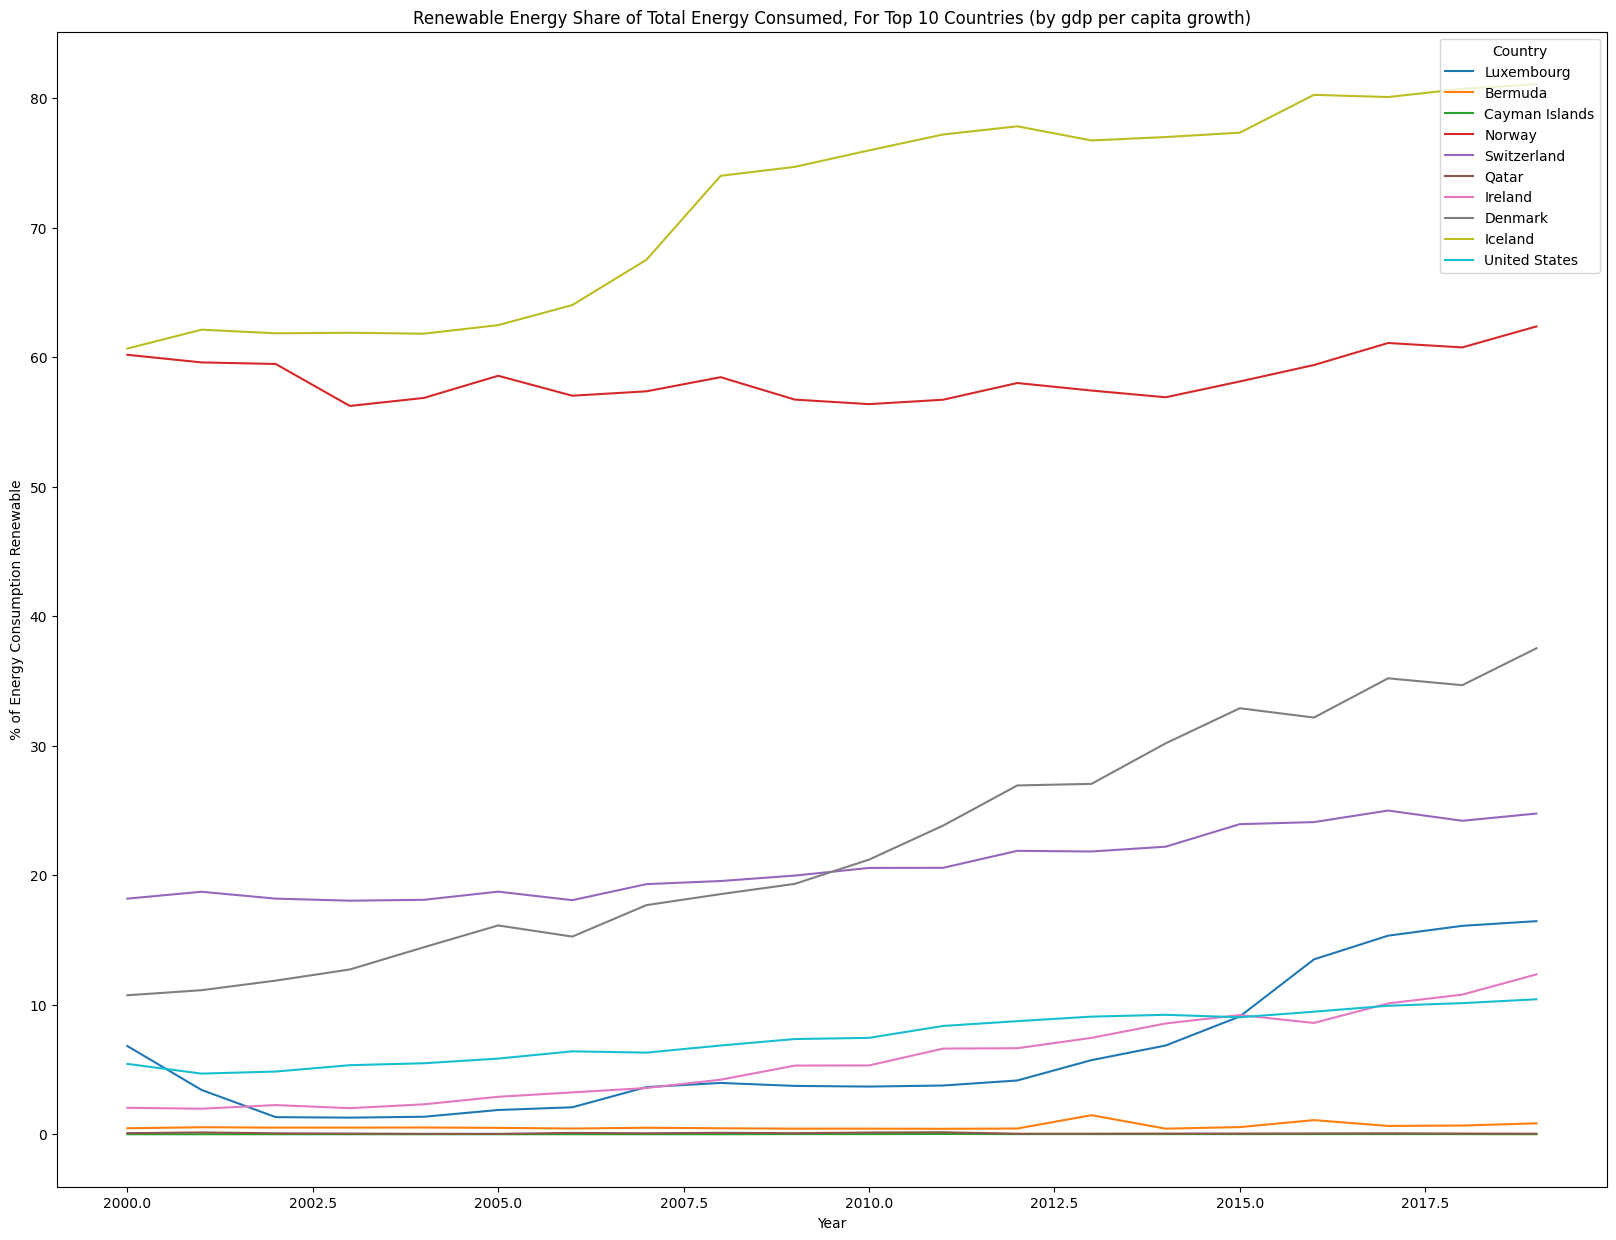

In [72]:
# Now I am going to visualize the Renewable Energy Share of Total Energy for each of the Top 10 countries over time.
# To do this I will iterate through each country and plot a line that shows the percentage of total energy consumed that is from Renewables.

plt.figure(figsize=(20, 15))

for country in top_10:
    country_data = top_10_all[top_10_all['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewable energy share in the total final energy consumption (%)'],label=str(country))

plt.title('Renewable Energy Share of Total Energy Consumed, For Top 10 Countries (by gdp per capita growth)')
plt.xlabel('Year')
plt.ylabel('% of Energy Consumption Renewable')
plt.legend(title='Country',loc='upper right')
plt.show()


In [73]:
# Now I want to investigate developing countries - Some countries didnt have financial inflow every year, so to determine developing countries, 
# I am selecting countries where they have had financial inflows for at least 50% of the years. 

# Total years with financial inflows for each country
non_na_counts = data.groupby('Entity')['Financial flows to developing countries (US $)'].count()

# Total years for each country
total_counts = data.groupby('Entity')['Year'].count()

# Initialising eligible_countries (where they have received financial inflows for at least 50% of the years)
eligible_countries = non_na_counts[non_na_counts / total_counts >= 0.5].index.tolist()

# Creating a new DF that represents countries that have received Financial flows at least 50% of the years.
developing_countries = data[data['Entity'].isin(eligible_countries)]

In [74]:
# checking what the new DF looks like
developing_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            1709 non-null   object 
 1   Year                                                              1709 non-null   int64  
 2   Access to electricity (% of population)                           1700 non-null   float64
 3   Access to clean fuels for cooking                                 1688 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              1709 non-null   float64
 5   Financial flows to developing countries (US $)                    1327 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  1628 non-null   float64
 7   Electricity from fossil fuels (TWh)   

In [75]:
# Now I am going to select the top 10 countries by gdp_per_capita to work with.

# Calculating the mean gdp growth for each country over the years
avg_gdp_per_capita = developing_countries.groupby('Entity')['gdp_per_capita'].mean()

# Savings the top 10 countries to a list.
top_10_countries = avg_gdp_per_capita.sort_values(ascending=False).head(10)
top_10_countries = top_10_countries.index.tolist()

# Creating a new DF of the top 10 countries with all the information 
top_10_full_data = developing_countries[developing_countries['Entity'].isin(top_10_countries)]


In [76]:
developing_countries['Renewable energy share in the total final energy consumption (%)'].isna().value_counts()

Renewable energy share in the total final energy consumption (%)
False    1628
True       81
Name: count, dtype: int64

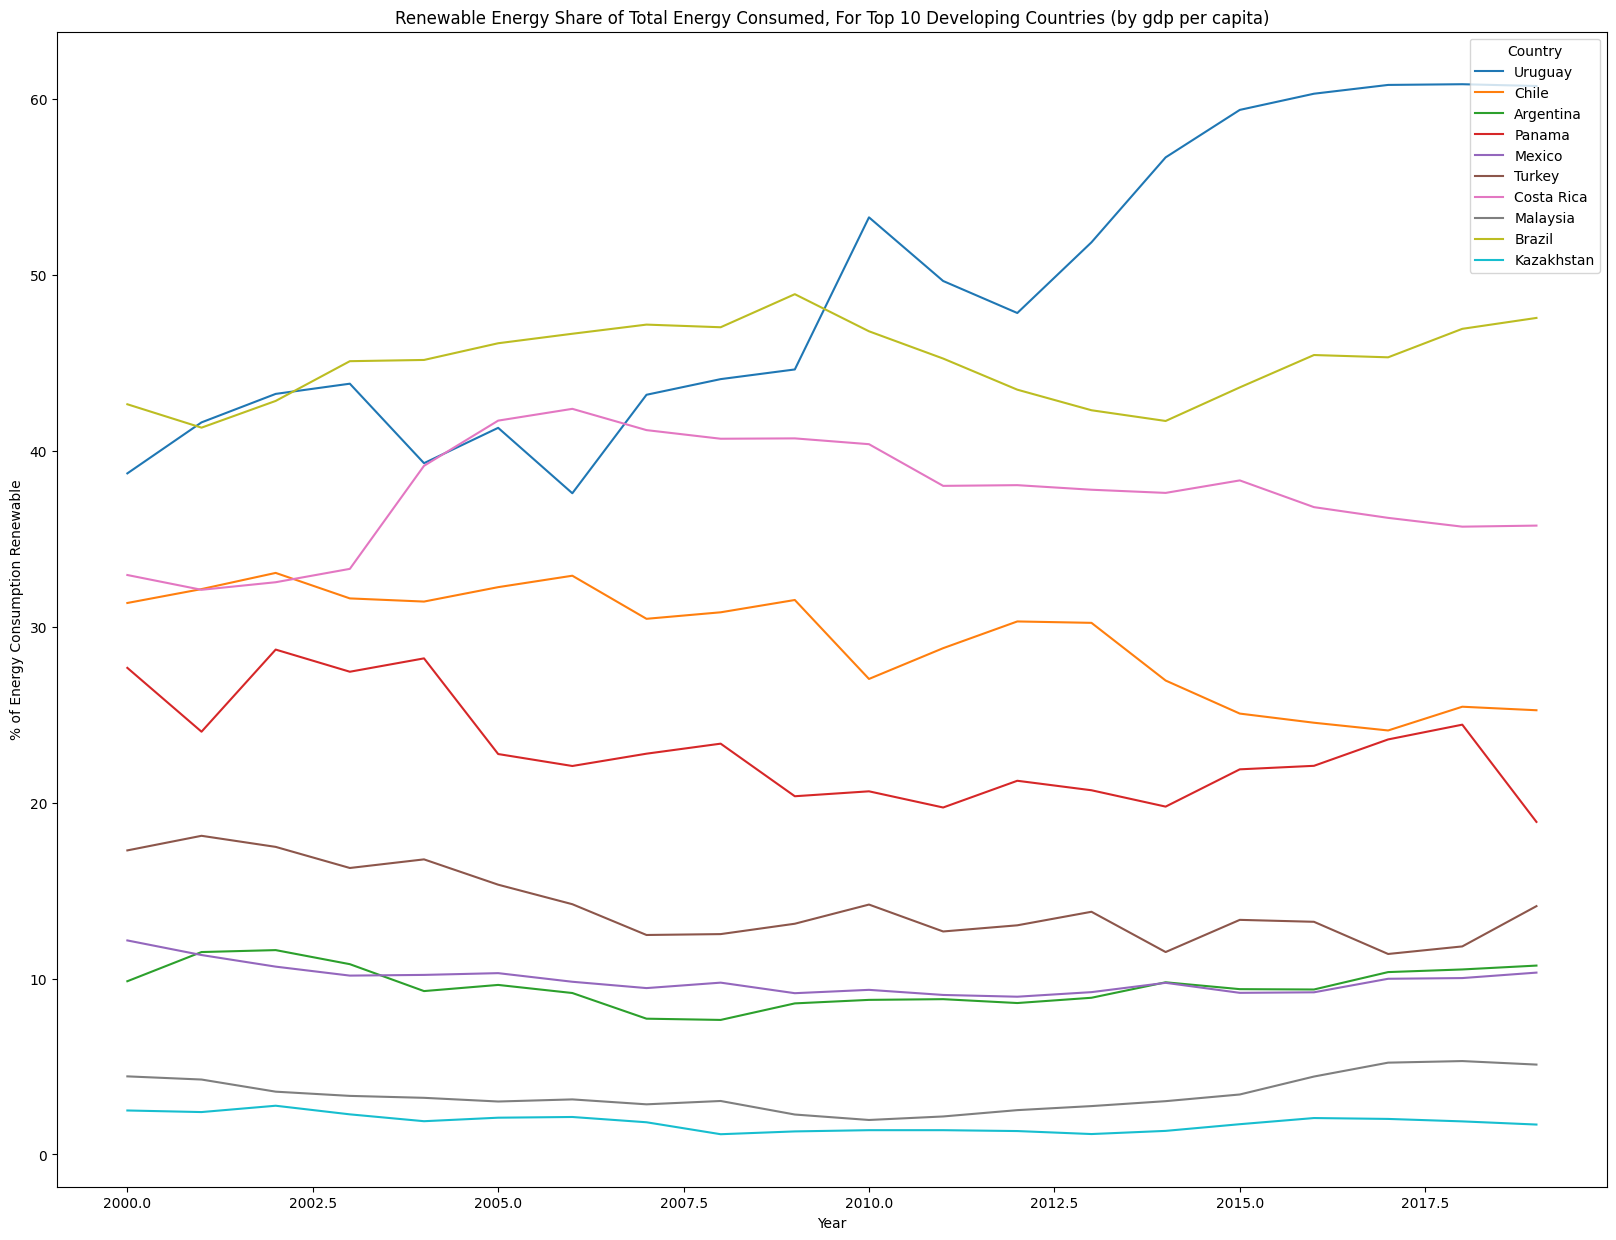

In [77]:
# Now I am going to visualize the Renewable Energy Share of Total Energy for each of the Top 10 developing countries over time.
# To do this I will iterate through each country and plot a line that shows the percentage of total energy consumed that is from Renewables.

plt.figure(figsize=(20, 15))

for country in top_10_countries:
    country_data = developing_countries[developing_countries['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewable energy share in the total final energy consumption (%)'],label=str(country))

plt.title('Renewable Energy Share of Total Energy Consumed, For Top 10 Developing Countries (by gdp per capita)')
plt.xlabel('Year')
plt.ylabel('% of Energy Consumption Renewable')
plt.legend(title='Country',loc='upper right')
plt.show()


In [78]:
# Now I'm going to look at energy trends for a selection of OECD nations.
# First I will create a list of the selected OECD nations

oecd_countries_list = ['Australia', 'Japan', 'South Korea', 'New Zealand', 'Germany', 'United Kingdom', 'France', 'Sweden', 'United States', 'Canada']

# Next I will create a new DF that includes data from these countries.

oecd_countries = data[data['Entity'].isin(oecd_countries_list)]


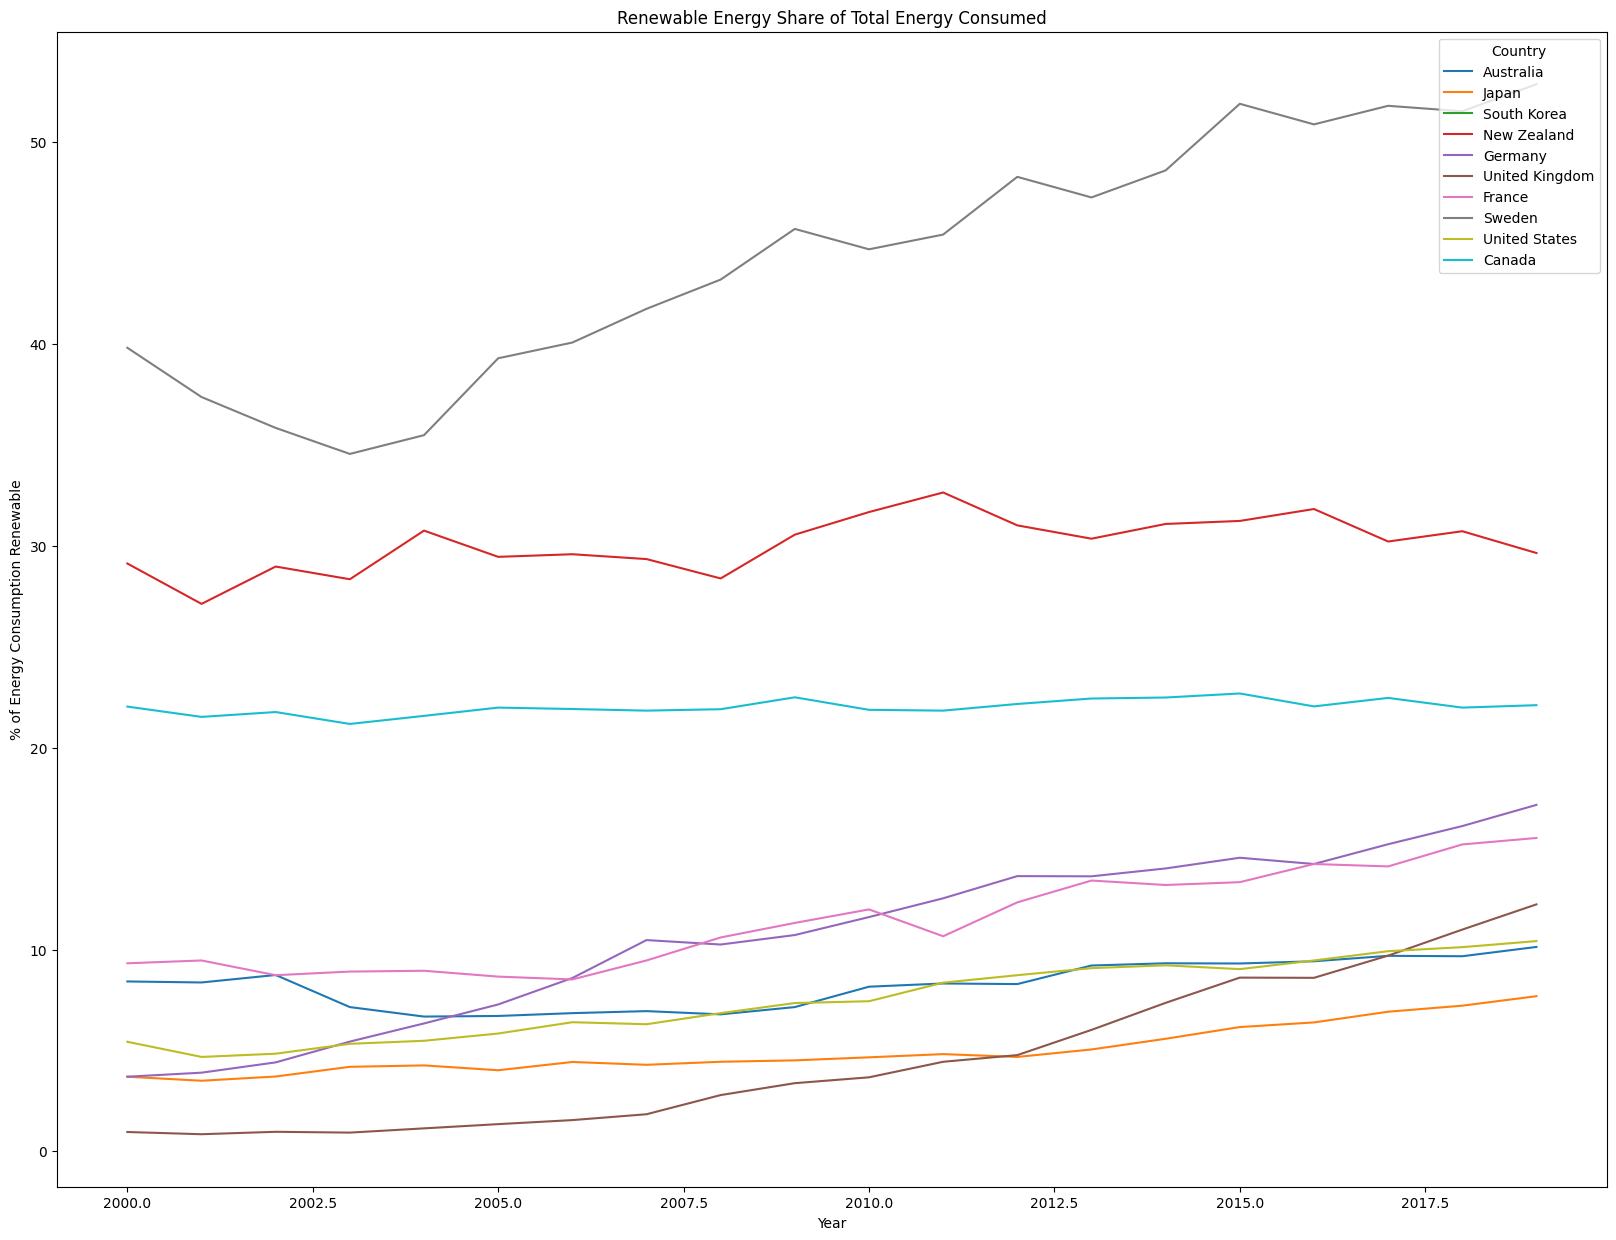

In [79]:
# Next I am going to plot the renewable energy share for the OECD countries list

plt.figure(figsize=(20, 15))

for country in oecd_countries_list:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewable energy share in the total final energy consumption (%)'],label=str(country))

plt.title('Renewable Energy Share of Total Energy Consumed')
plt.xlabel('Year')
plt.ylabel('% of Energy Consumption Renewable')
plt.legend(title='Country',loc='upper right')
plt.show()


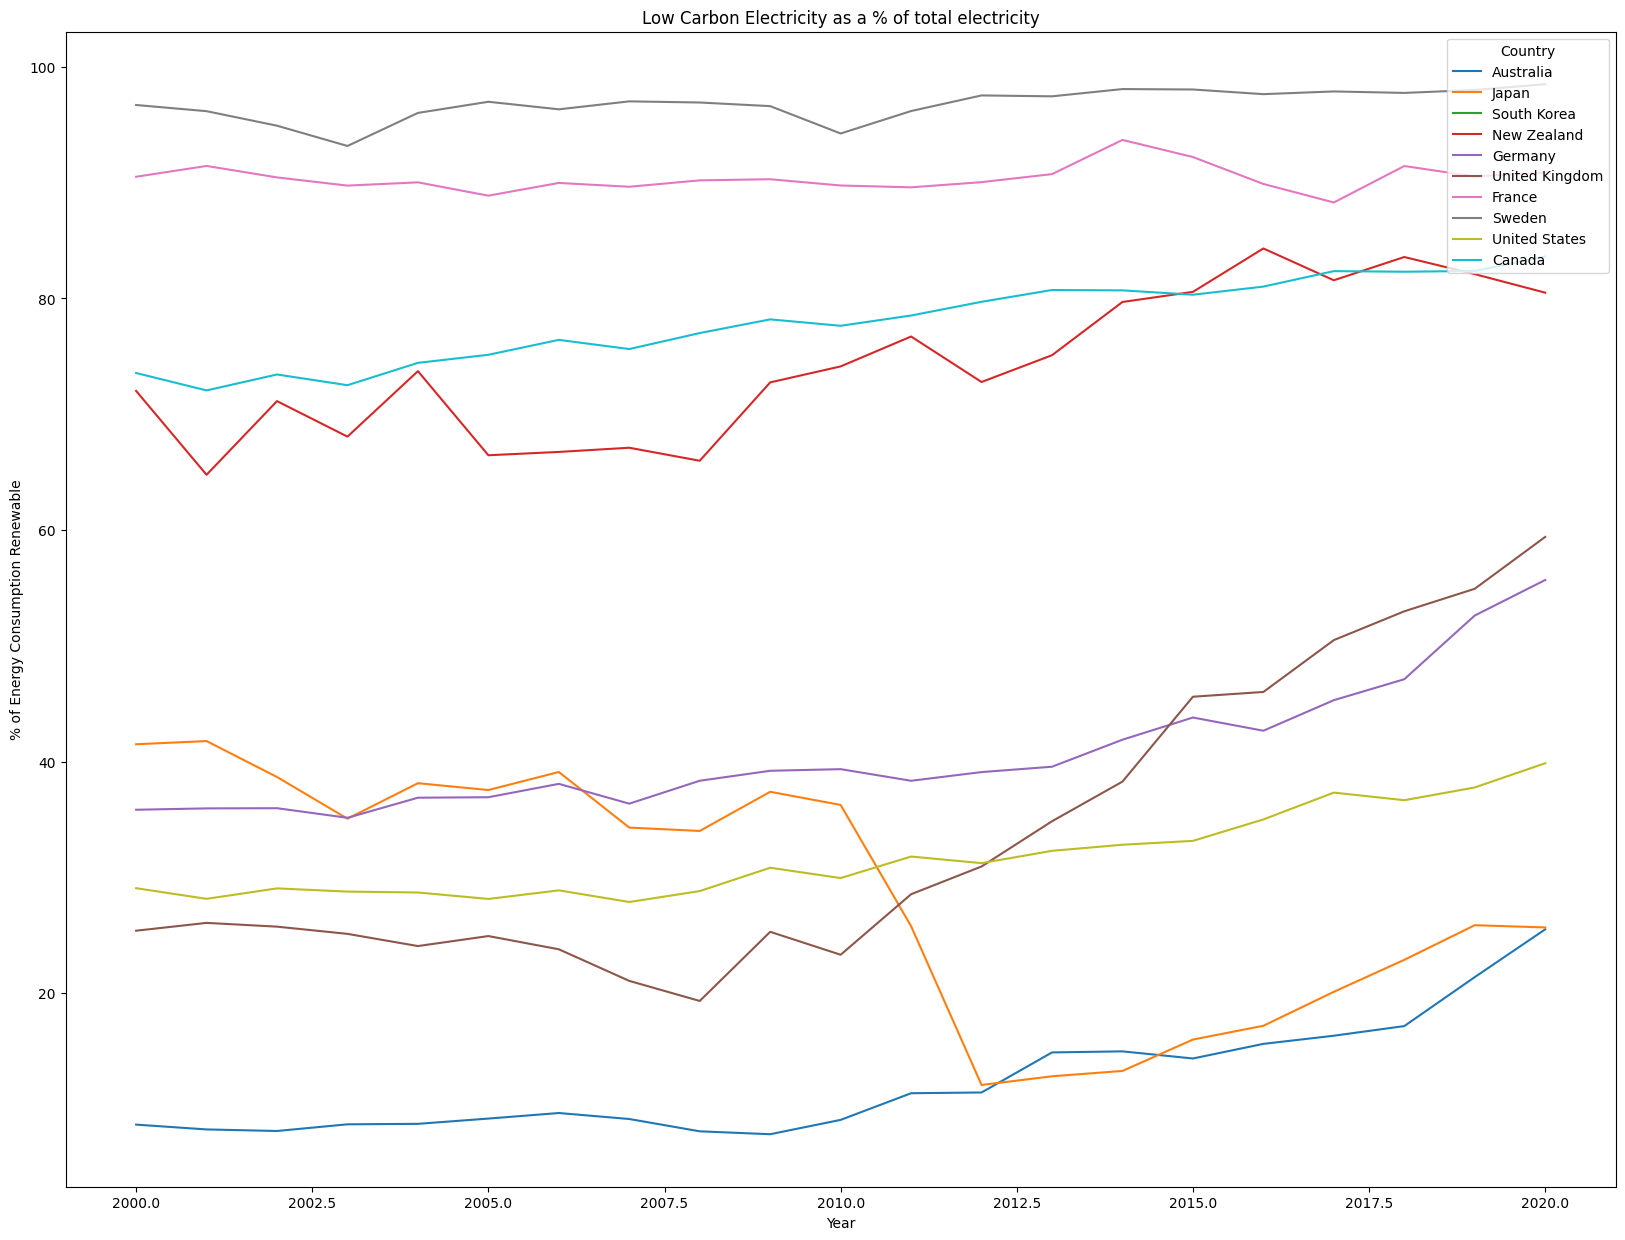

In [80]:
# Next I am going to plot the clean energy share for the OECD countries list

plt.figure(figsize=(20, 15))

for country in oecd_countries_list:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Low-carbon electricity (% electricity)'],label=str(country))

plt.title('Low Carbon Electricity as a % of total electricity')
plt.xlabel('Year')
plt.ylabel('% of Energy Consumption Renewable')
plt.legend(title='Country',loc='upper right')
plt.show()


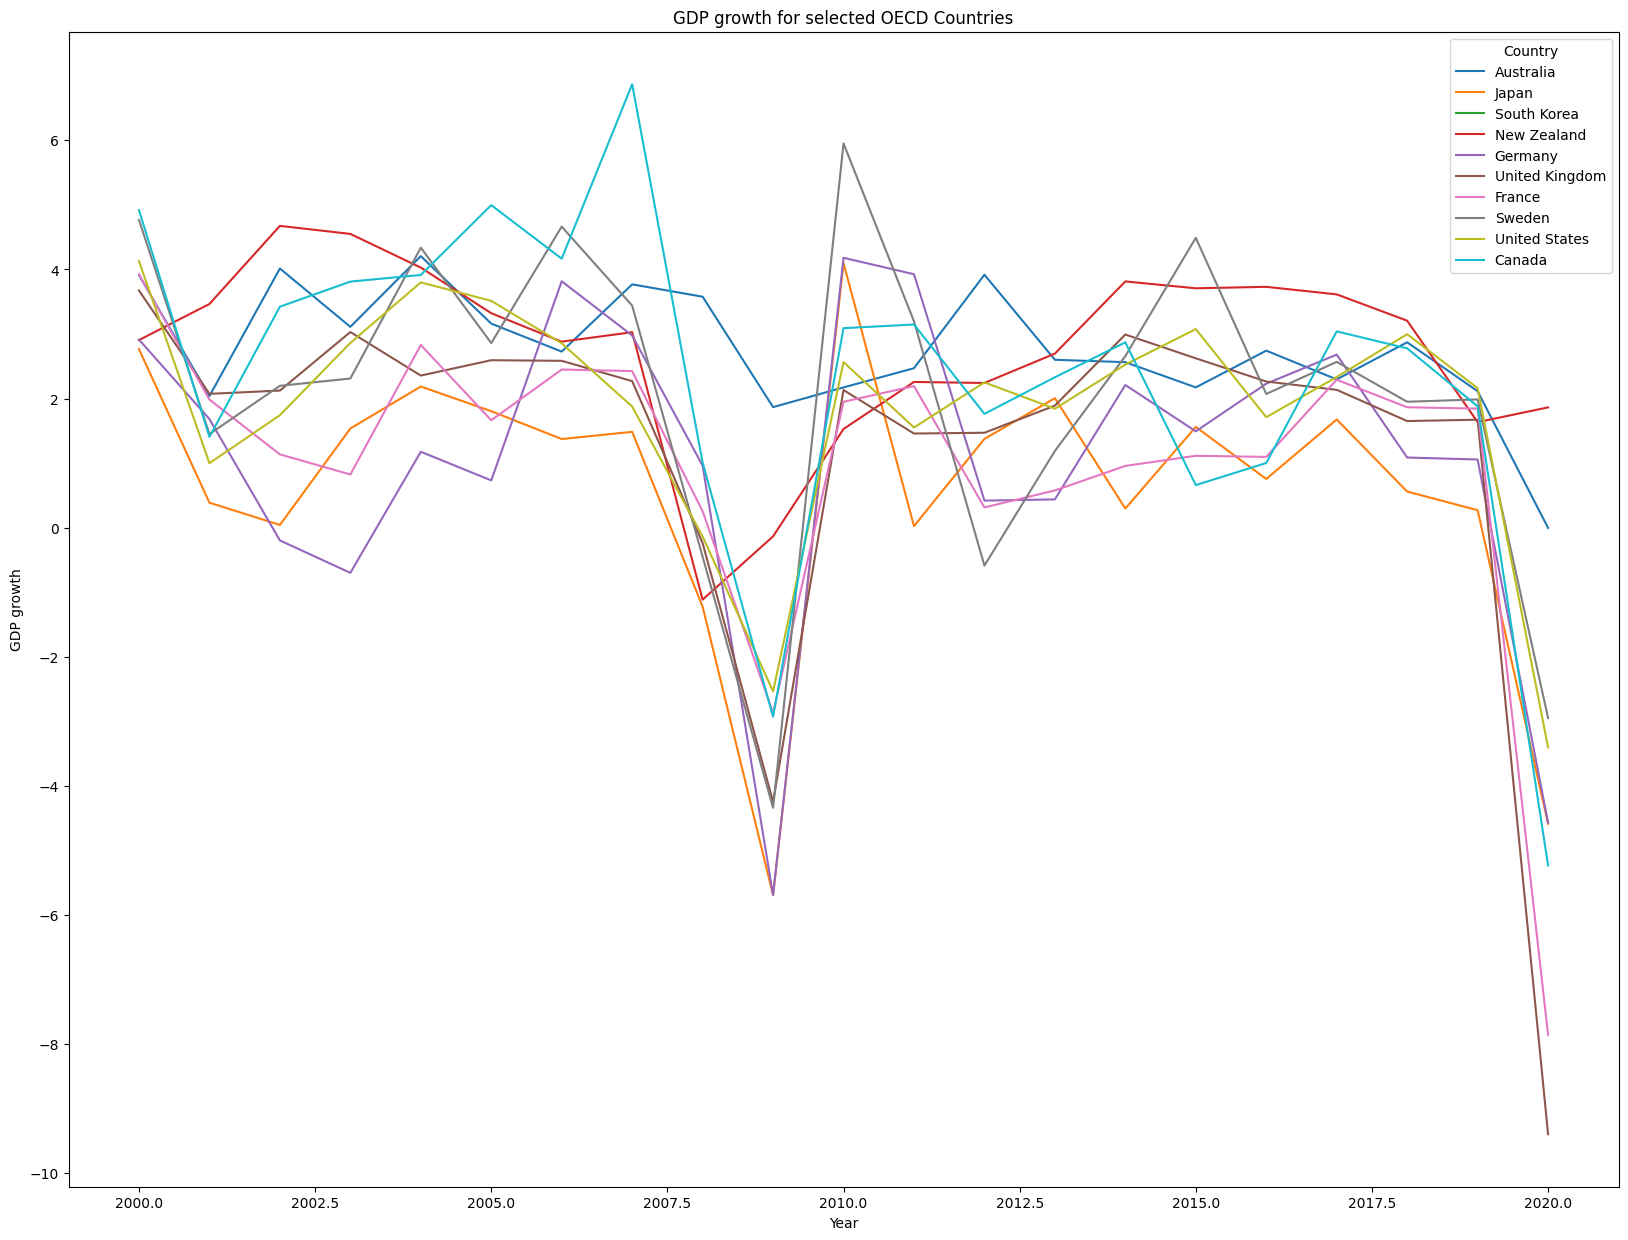

In [81]:
# Lets look at gdp growth
plt.figure(figsize=(20, 15))

for country in oecd_countries_list:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['gdp_growth'],label=str(country))

plt.title('GDP growth for selected OECD Countries')
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.legend(title='Country',loc='upper right')
plt.show()

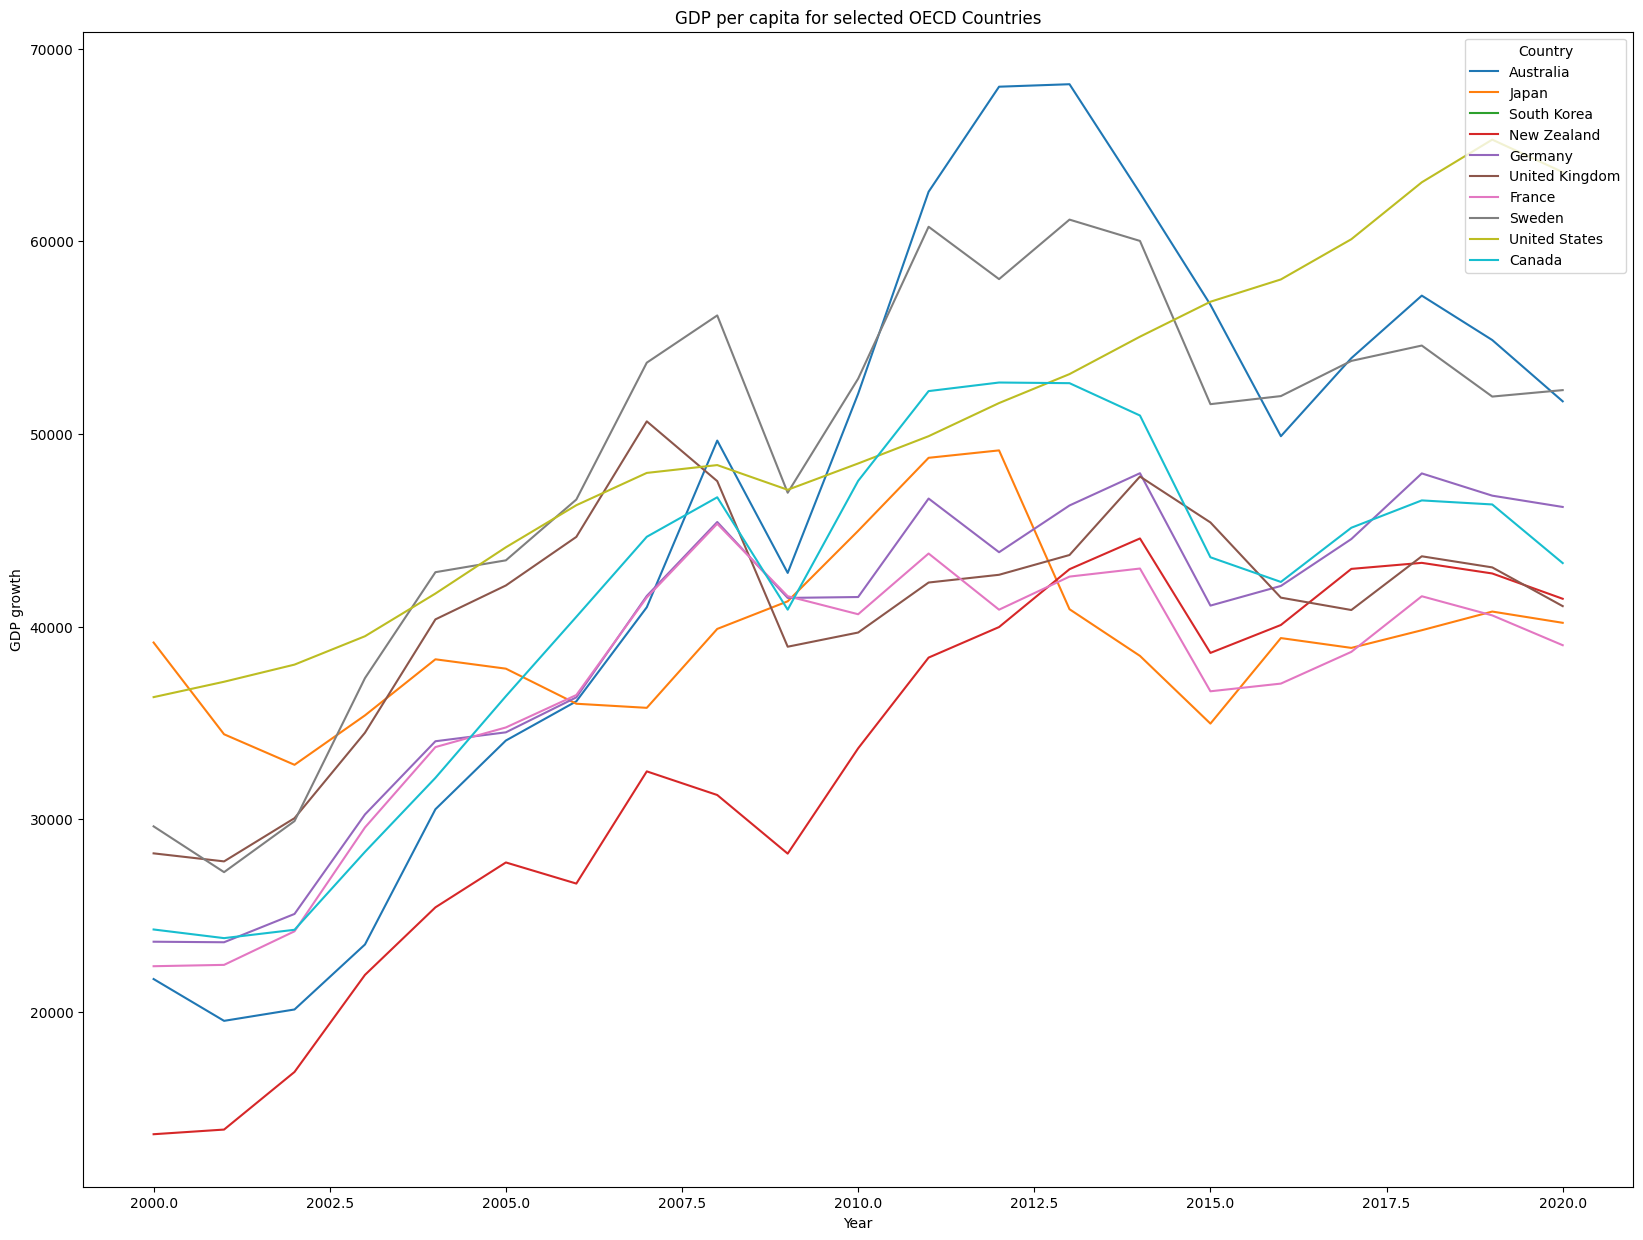

In [82]:
# Lets look at gdp per capita
plt.figure(figsize=(20, 15))

for country in oecd_countries_list:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'],label=str(country))

plt.title('GDP per capita for selected OECD Countries')
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.legend(title='Country',loc='upper right')
plt.show()

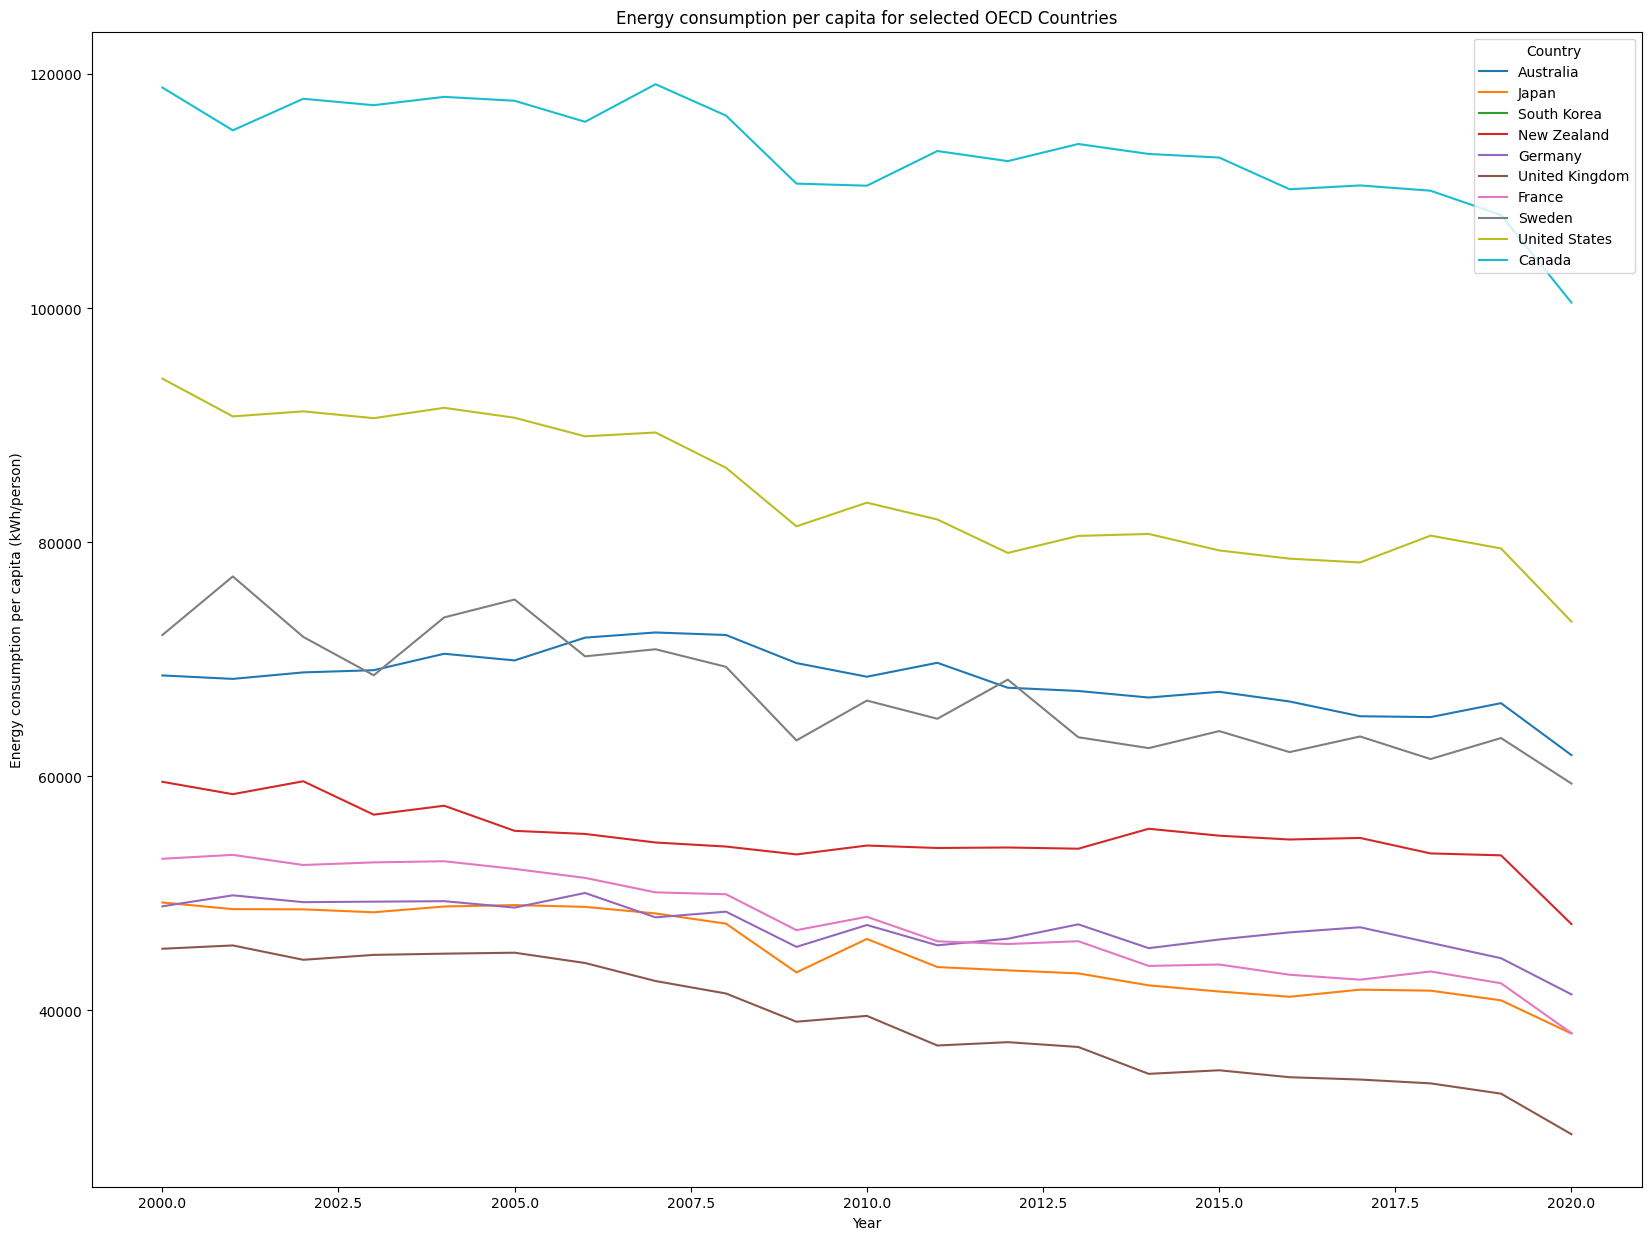

In [83]:
# Lets look at energy consumption per capita
plt.figure(figsize=(20, 15))

for country in oecd_countries_list:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Primary energy consumption per capita (kWh/person)'],label=str(country))

plt.title('Energy consumption per capita for selected OECD Countries')
plt.xlabel('Year')
plt.ylabel('Energy consumption per capita (kWh/person)')
plt.legend(title='Country',loc='upper right')
plt.show()

In [84]:
# So now I want to explore the energy trends for New Zealand

# I'll start by creating a DF that is just for New Zealand

new_zealand = data[data['Entity'] == 'New Zealand']
new_zealand.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [85]:
# Let's look at New Zealands renewal energy share of total consumption compared to other OECD countries.

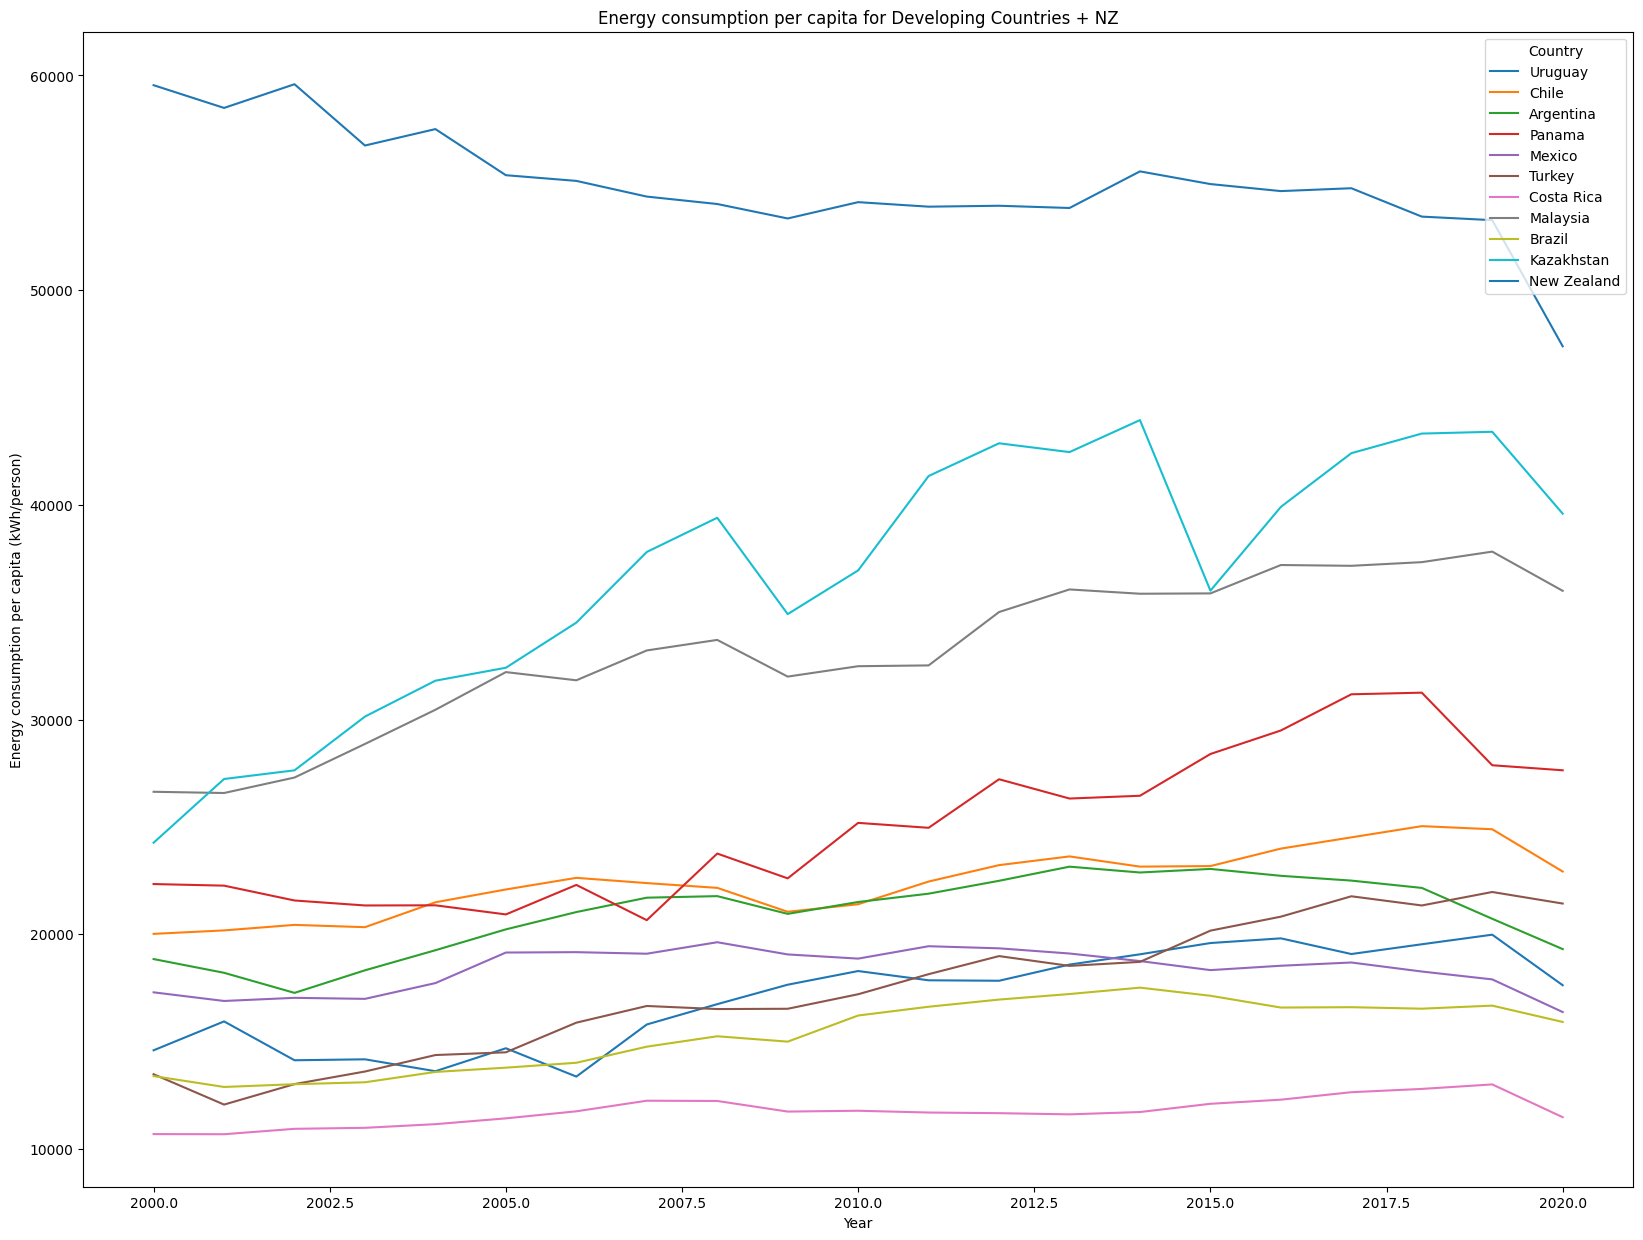

In [86]:
# Let's compare NZ to the top 10 developing countries.
top_10_countries_plus_NZ = top_10_countries + ['New Zealand']

# Creating a DF of top 10 developing countries + NZ
top_10_dev_nz = pd.concat([new_zealand, top_10_full_data],ignore_index=True)

plt.figure(figsize=(20, 15))

for country in top_10_countries_plus_NZ:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Primary energy consumption per capita (kWh/person)'],label=str(country))

plt.title('Energy consumption per capita for Developing Countries + NZ')
plt.xlabel('Year')
plt.ylabel('Energy consumption per capita (kWh/person)')
plt.legend(title='Country',loc='upper right')
plt.show()

In [87]:
#Now I am going to create a visualizaton of the amount of renewable energy in 2020 for each country.

renewable_energy_share_2019 = data[data['Year'] == 2019][['Entity', 'Renewable energy share in the total final energy consumption (%)']]
renewable_energy_share_2019

,Entity,Renewable energy share in the total final energy consumption (%)
19,Afghanistan,18.51
40,Albania,NaN
61,Algeria,0.16
82,Angola,54.69
103,Antigua and Barbuda,0.91
...,...,...
3563,Uzbekistan,1.57
3584,Vanuatu,31.86
3605,Yemen,3.11
3626,Zambia,84.50


In [96]:
# Initialize the map
m = folium.Map(location=[0, 0], zoom_start=3)

# Add the choropleth layer
choro = Choropleth(
    geo_data="archive/countries.geojson",
    name='choropleth',
    data=renewable_energy_share_2019,
    columns=['Entity', 'Renewable energy share in the total final energy consumption (%)'],
    key_on='feature.properties.ADMIN',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

# Function to add popups
def add_popup(feature, **kwargs):
    country_name = feature['properties']['ADMIN']
    renewable_share = renewable_dict.get(country_name, 'Data not available')
    popup_text = f"{country_name}<br>Renewable Energy Share: {renewable_share}%"
    Popup(popup_text).add_to(kwargs['color_map'])

# Add popups
choro.geojson.add_child(folium.GeoJsonTooltip(fields=["ADMIN"]))
choro.geojson.add_child(folium.GeoJson(data=open("archive/countries.geojson").read(),
                                       style_function=lambda feature: {
                                           'fillColor': 'grey',
                                           'color': 'black',
                                           'weight': 1,
                                           'dashArray': '5, 5'
                                       },
                                       highlight_function=lambda x: {'weight':3, 'fillColor':'#666666'},
                                       smooth_factor=0.1,
                                       zoom_on_click=False)
                         ).add_to(m)

# Show the map
m

NameError: name 'choro' is not defined